In [1]:
# css 수정 가로 셀크기 수정
from IPython.core.display import display, HTML
display(HTML("<style>.container { font-weight: bold !important; }</style>"))
display(HTML("<style>.container { width: 100% !important; }</style>"))

In [2]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings('ignore')

In [3]:
dt_clf = DecisionTreeClassifier(random_state=156)

In [4]:
iris_data = load_iris()
X_train, X_test, y_train, y_test = train_test_split(iris_data.data, iris_data.target, test_size=0.2, random_state=11)

In [5]:
dt_clf.fit(X_train,y_train)

DecisionTreeClassifier(random_state=156)

In [6]:
from sklearn.tree import export_graphviz

In [7]:
# export_graphviz()의 호출 결과로 out_file로 지정된 tree.dot 파일을 생성함.
export_graphviz(dt_clf, out_file="tree.dot", class_names=iris_data.target_names, \
                feature_names = iris_data.feature_names, impurity=True, filled=True)

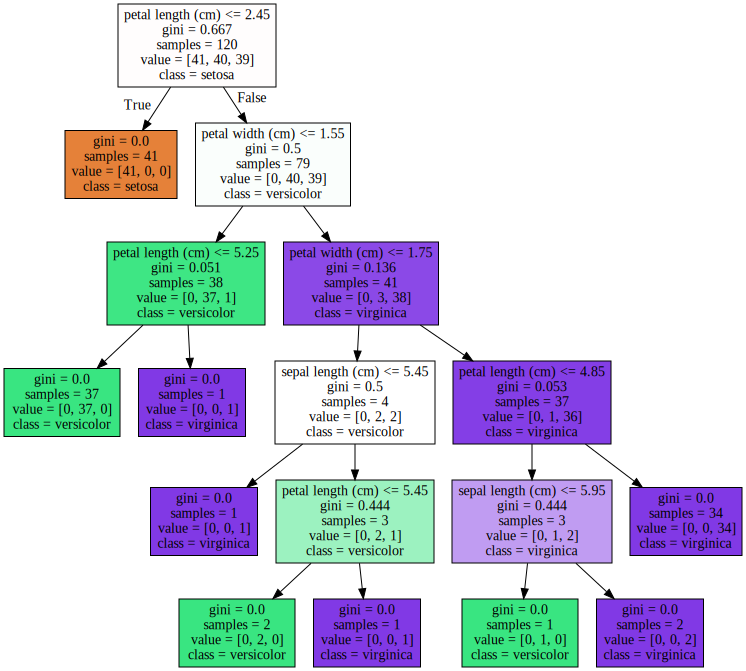

In [8]:
import graphviz

# 위에서 생성된 tree.dot 파일을 Graphviz가 읽어서 주피터 노트북상에서 시각화
with open("tree.dot") as f:
    dot_graph = f.read()

graphviz.Source(dot_graph)

## 타이타닉 데이터 실습

In [9]:
import pandas as pd
import numpy as np

In [10]:
import seaborn as sns

In [11]:
titanic = sns.load_dataset('titanic')

In [12]:
titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   survived     891 non-null    int64   
 1   pclass       891 non-null    int64   
 2   sex          891 non-null    object  
 3   age          714 non-null    float64 
 4   sibsp        891 non-null    int64   
 5   parch        891 non-null    int64   
 6   fare         891 non-null    float64 
 7   embarked     889 non-null    object  
 8   class        891 non-null    category
 9   who          891 non-null    object  
 10  adult_male   891 non-null    bool    
 11  deck         203 non-null    category
 12  embark_town  889 non-null    object  
 13  alive        891 non-null    object  
 14  alone        891 non-null    bool    
dtypes: bool(2), category(2), float64(2), int64(4), object(5)
memory usage: 80.7+ KB


In [13]:
titanic.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [14]:
titanic.drop(columns=['deck', 'embark_town', 'alive', 'alone', 'who', 'adult_male', 'parch', 'sibsp'], inplace=True)

In [15]:
titanic.head()

,survived,pclass,sex,age,fare,embarked,class
0,0,3,male,22.0,7.2500,S,Third
1,1,1,female,38.0,71.2833,C,First
2,1,3,female,26.0,7.9250,S,Third
3,1,1,female,35.0,53.1000,S,First
4,0,3,male,35.0,8.0500,S,Third


In [16]:
# 카테고리 타입 변환
titanic['sex'] = titanic['sex'].astype('category').cat.codes
titanic['embarked'] = titanic['embarked'].astype('category').cat.codes
titanic['class'] = titanic['class'].astype('category').cat.codes

In [17]:
titanic.dropna(inplace=True)

In [18]:
titanic

,survived,pclass,sex,age,fare,embarked,class
0,0,3,1,22.0,7.2500,2,2
1,1,1,0,38.0,71.2833,0,0
2,1,3,0,26.0,7.9250,2,2
3,1,1,0,35.0,53.1000,2,0
4,0,3,1,35.0,8.0500,2,2
...,...,...,...,...,...,...,...
885,0,3,0,39.0,29.1250,1,2
886,0,2,1,27.0,13.0000,2,1
887,1,1,0,19.0,30.0000,2,0
889,1,1,1,26.0,30.0000,0,0


In [19]:
titanic_x = np.array(titanic[['pclass', 'sex', 'age', 'fare', 'embarked', 'class']])
titanic_y = np.array(titanic['survived'])

In [20]:
dt_clf = DecisionTreeClassifier(random_state=156)

In [21]:
X_train, X_test, y_train, y_test = train_test_split(titanic_x, titanic_y, test_size=0.2, random_state=11)

In [22]:
dt_clf.fit(X_train,y_train)

DecisionTreeClassifier(random_state=156)

In [23]:
export_graphviz(dt_clf, out_file="titanic_tree.dot", class_names=['0', '1'], \
                feature_names = ['pclass', 'sex', 'age', 'fare', 'embarked', 'class'], impurity=True, filled=True)

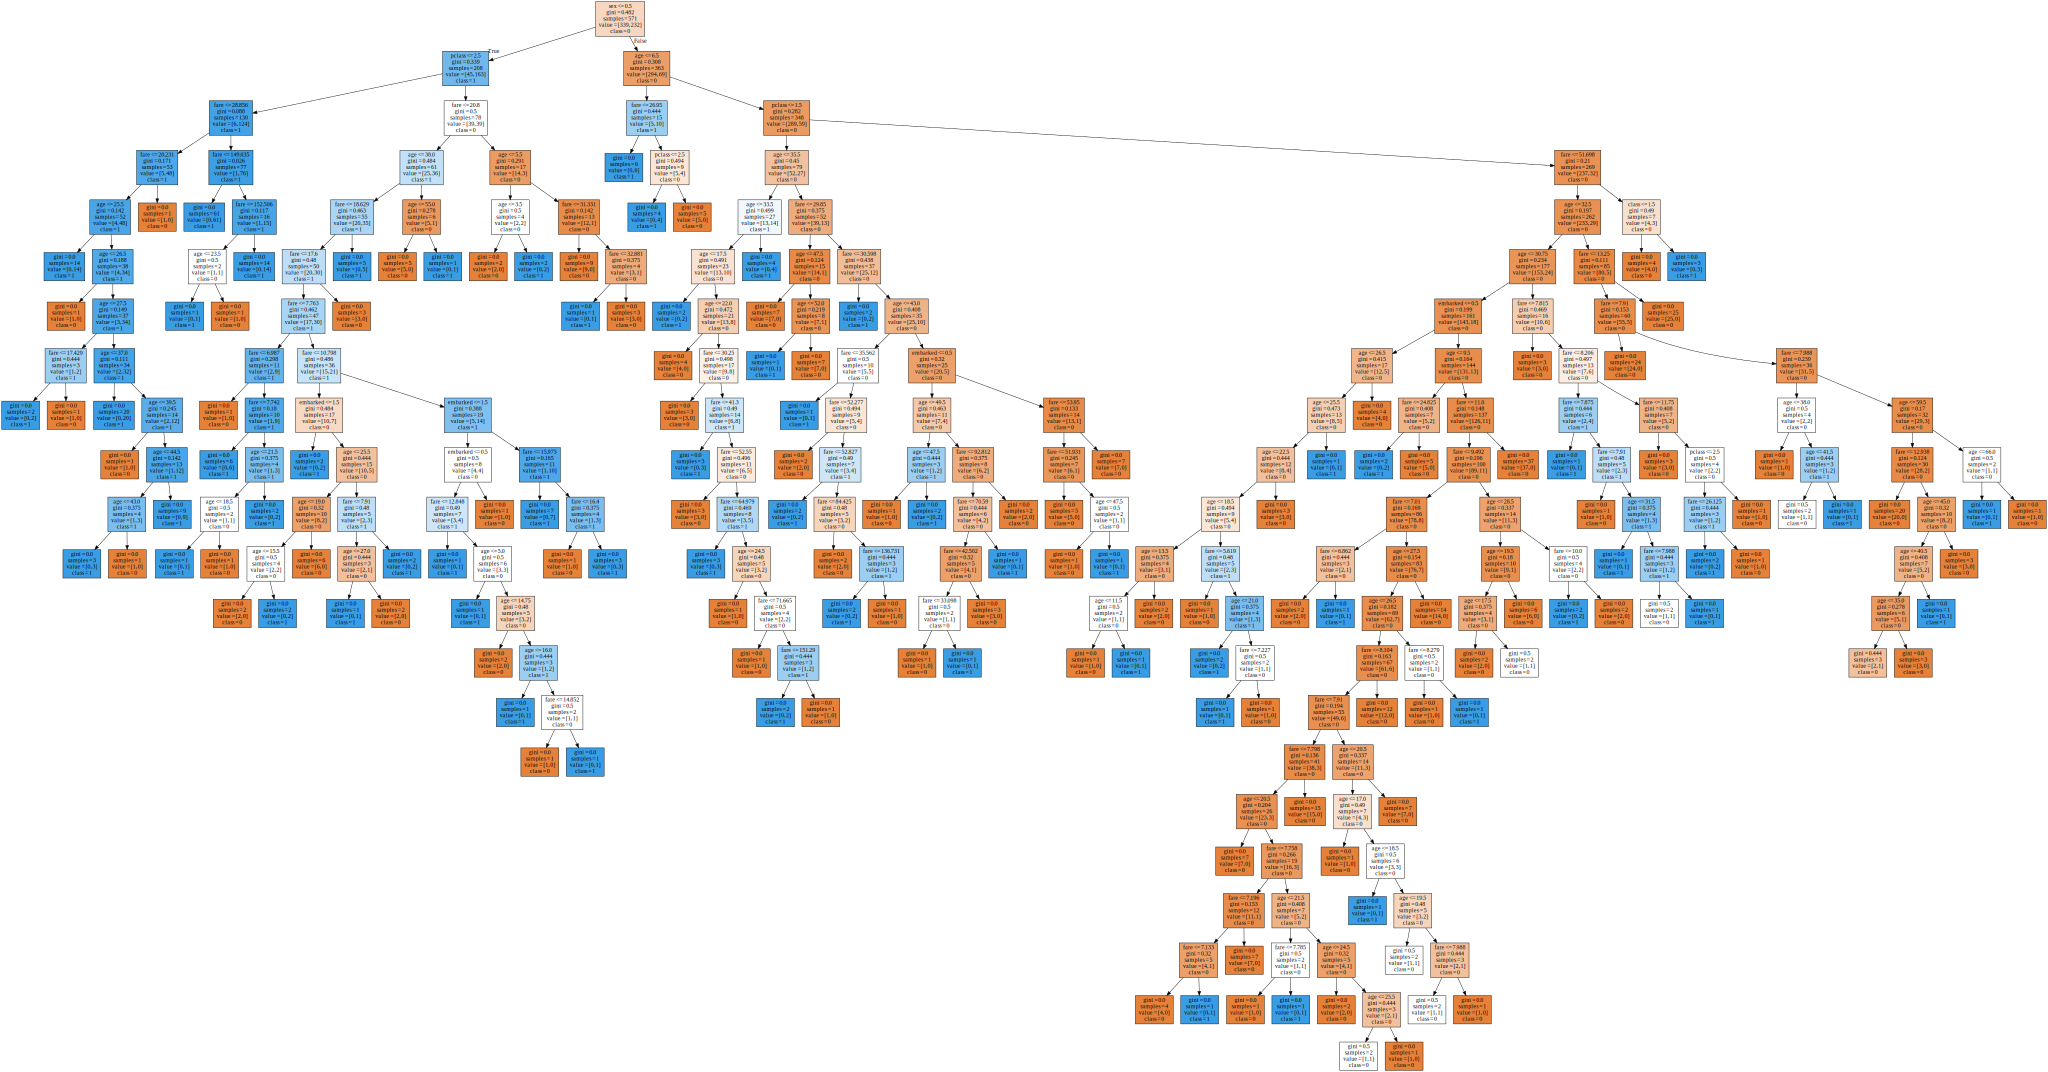

In [24]:
with open("titanic_tree.dot") as f:
    dot_graph = f.read()

graphviz.Source(dot_graph)